# Reading data sets
- IC50
- Genomic Featuers
- Drug Decoder

In [5]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = (10,6)

Populating the interactive namespace from numpy and matplotlib


In [6]:
# let us import some functions
from gdsctools import IC50, DrugDecode, GenomicFeatures
# and data sets
from gdsctools import ic50_test, genomic_features
from gdsctools.datasets import testing

## IC50

The first type of data set to be used in the anlaysis is the matrix of IC50. There is a test file called **ic50_test** that gives the location of such a file


In [7]:
ic50 = IC50(ic50_test)

In [8]:
print(ic50)

Number of drugs: 11
Number of cell lines: 988
Percentage of NA 0.20656974604343026



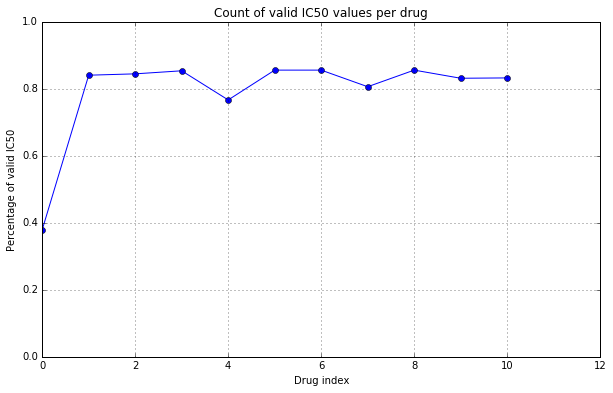

In [9]:
data = ic50.plot_ic50_count(marker='o')
title("Count of valid IC50 values per drug")

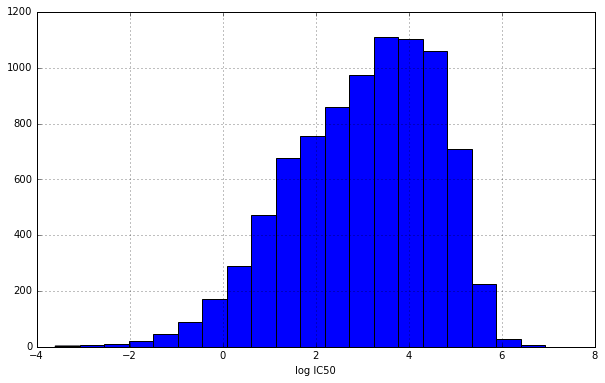

In [10]:
data = ic50.hist()

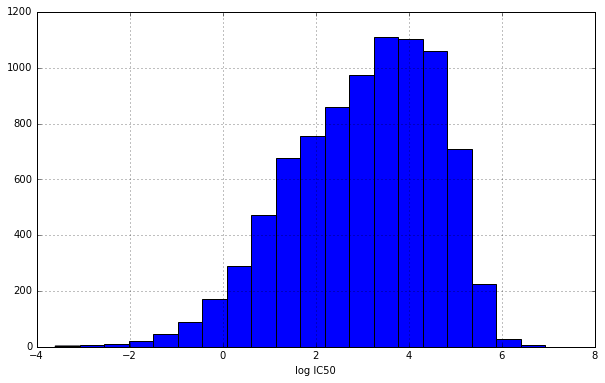

In [11]:
drug_to_drop  = ['Drug_999_IC50', 'Drug_1047_IC50', 'Drug_1049_IC50',
                'Drug_1050_IC50', 'Drug_1052_IC50', 'Drug_1053_IC50']
dummy = ic50.drop_drugs(drug_to_drop)
data = ic50.hist()

## Genomic Features

In [12]:
f = GenomicFeatures() # default from the package

This is equivalent to 

In [13]:
f = GenomicFeatures(genomic_features)

In [14]:
print(f)

Genomic features distribution
Number of unique tissues 27
Here are the first 10 tissues: myeloma, nervous_system, soft_tissue, bone, lung_NSCLC, skin, Bladder, cervix, lung_SCLC, lung
MSI column: yes
MEDIA column: no

There are 47 unique features distributed as
- Mutation: 47
- CNA (gain): 0
- CNA (loss): 0


Note that this GenomicFeatures matrix must have 3 special columns
to provide the sample name, Tissue Factor Value and MSI factor value. 
Then all features.

In [15]:
f.df.iloc[0:3]

,TISSUE_FACTOR,MSI_FACTOR,ABCB1_mut,ABL2_mut,ACACA_mut,ACVR1B_mut,ACVR2A_mut,AFF4_mut,AHCTF1_mut,AHNAK_mut,...,BAZ2B_mut,BCLAF1_mut,BCOR_mut,BCR-ABL_mut,BLM_mut,BMPR2_mut,BNC2_mut,BPTF_mut,BRAF_mut,TP53_mut
COSMIC_ID,,,,,,,,,,,,,,,,,,,,,
683665,myeloma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
683667,nervous_system,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
684052,soft_tissue,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


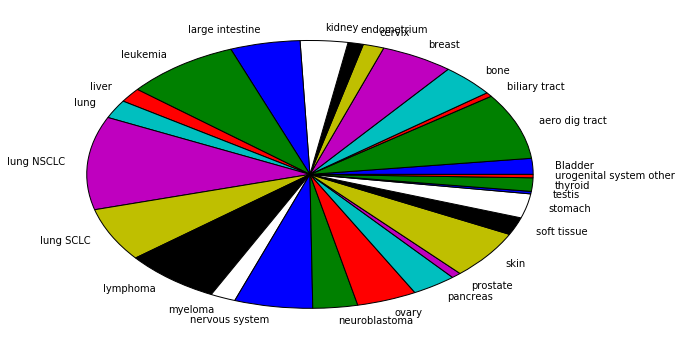

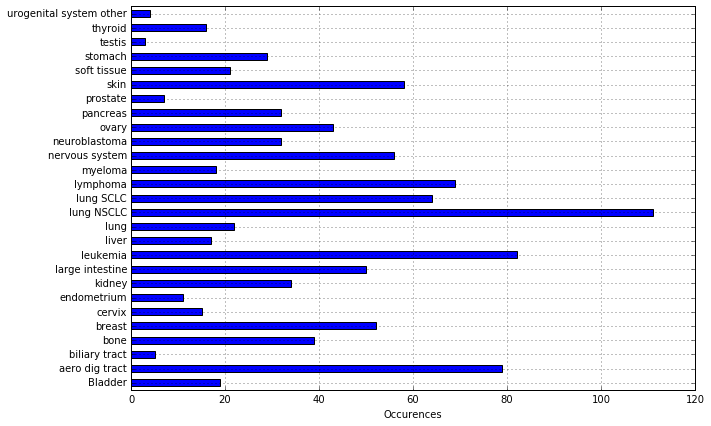

In [16]:
df = f.plot()

In [17]:
groups = f.df.groupby('TISSUE_FACTOR').groups
to_remove = []
for tissue in groups.keys():
    if len(groups[tissue])<40:
        to_remove.append(tissue)


aero dig tract      79
breast              52
large intestine     50
leukemia            82
lung NSCLC         111
lung SCLC           64
lymphoma            69
nervous system      56
ovary               43
skin                58
dtype: int64

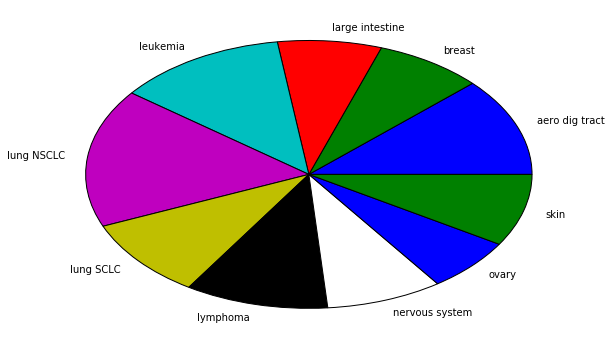

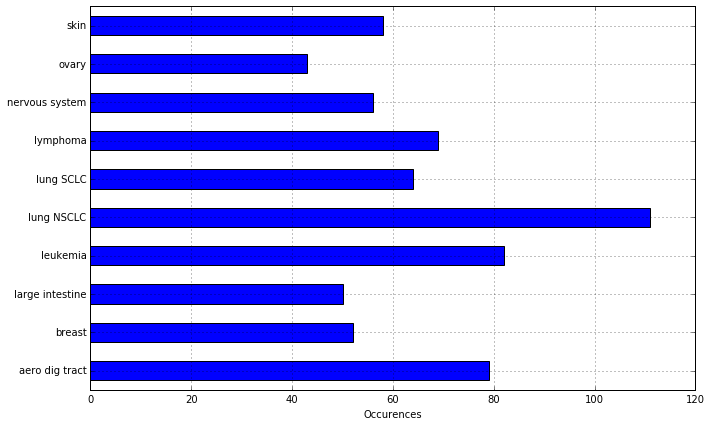

In [18]:
info = f.drop_tissue_in(to_remove)
f.plot()

## Drug Decoder

GDSCTools provides an IC50 test file (ic50_test). The drug identifiers are
usually encoded  with a unique identifier that have no meaning. A decoder
file may be provided. for example, we provide the drug_test data set

In [19]:
print(testing.drug_test_csv)

location: /home/cokelaer/Work/github/gdsctools/gdsctools/data/test_drug_decode.csv
description: drug_decode in CSV format
authors: GDSC consortium



In [20]:
dd = DrugDecode(testing.drug_test_csv)
print(dd)

Number of drugs: 11



It can be used to retrive the name and target of the drug

In [21]:
dd.get_name('Drug_1047_IC50')

'Nutlin-3a'

In [22]:
dd.get_target('Drug_1047_IC50')

'MDM2'

<hr>
<ht>
**Author: Thomas Cokelaer, Nov 2015**